# EDA

In [2]:
import numpy as np
import sklearn
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os
import os.path as path
import sys

# Import libraries
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import tensorflow
from tensorflow import keras
import preprocessor as p
import string
import re
%matplotlib inline

In [3]:
data_path = path.join("..", "data")

train_files = {
    "raw": path.join(data_path, "train-raw.tsv"),
    "top10": path.join(data_path, "train-top10.csv"),
    "top50": path.join(data_path, "train-top50.csv"),
    "top100": path.join(data_path, "train-top100.csv"),
}

test_files = {
    "raw": path.join(data_path, "test-raw.tsv"),
    "top10": path.join(data_path, "test-top10.csv"),
    "top50": path.join(data_path, "test-top50.csv"),
    "top100": path.join(data_path, "test-top100.csv"),
}

dev_files = {
    "raw": path.join(data_path, "dev-raw.tsv"),
    "top10": path.join(data_path, "dev-top10.csv"),
    "top50": path.join(data_path, "dev-top50.csv"),
    "top100": path.join(data_path, "dev-top100.csv"),
}

train_raw = pd.read_csv(train_files["raw"], sep="\t")
train_10 = pd.read_csv(train_files["top10"])
train_50 = pd.read_csv(train_files["top50"])
train_100 = pd.read_csv(train_files["top100"])

test_raw = pd.read_csv(test_files["raw"], sep="\t")
test_10 = pd.read_csv(test_files["top10"])
test_50 = pd.read_csv(test_files["top50"])
test_100 = pd.read_csv(test_files["top100"])

dev_raw = pd.read_csv(dev_files["raw"], sep="\t")
dev_10 = pd.read_csv(dev_files["top10"])
dev_50 = pd.read_csv(dev_files["top50"])
dev_100 = pd.read_csv(dev_files["top100"])

## Initial Inspection

In [85]:
test_raw.head(5)

,Instance_ID,Location,Text
0,31,?,"Awesome @evomagazine cover, time to dive in yet another issue. https://t.co/pecFlufAYT"
1,32,?,@InceptCruze goes 4-30 smfh
2,33,?,Sad loss to business &amp; sailing worlds. #RIP #sydneytohobart #sydhob https://t.co/viy0npcWwW
3,34,?,@heavenlogin I would like my pokemon back in pokemon go I had a mew and ots gone like everything else pls give me back my pokemon Heaven Pls
4,35,?,#Hit30 Girls Talk Boys 5SOS


In [4]:
train_raw.head(5)

,Instance_ID,Location,Text
0,1,Melbourne,"\ud83c\udf17 @ Melbourne, Victoria, Australia ..."
1,2,Melbourne,"@theage Of course it costs more, minimum stand..."
2,3,Brisbane,Hope people make just as much noise as they di...
3,4,Perth,Pouring the perfect Prosecco \ud83e\udd42\ud83...
4,5,Perth,"$LNY losing traction at 0.014, see this retrac..."


### Distribution of labels  

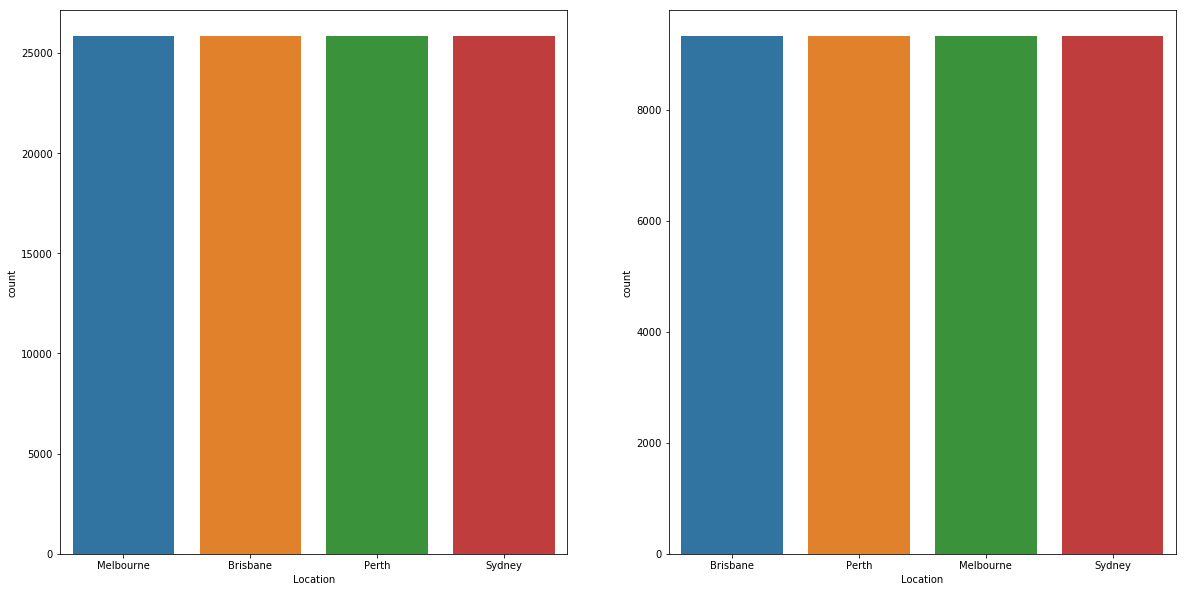

In [5]:
fig = plt.figure(figsize=[20, 10])
axs = fig.subplots(1, 2)
sns.countplot(train_raw.Location, ax=axs[0])
sns.countplot(dev_raw.Location, ax=axs[1])

The distribution of labels is very even 

### WordCloud

In [6]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

In [7]:
train_melbourne = train_raw[train_raw.Location == "Melbourne"]
train_sydney = train_raw[train_raw.Location == "Sydney"]
train_perth = train_raw[train_raw.Location == "Perth"]
train_brisbane = train_raw[train_raw.Location == "Brisbane"]

text_all = " ".join(train_raw.Text.values)
text_melbourne = " ".join(train_melbourne.Text.values)
text_sydney = " ".join(train_sydney.Text.values)
text_perth = " ".join(train_perth.Text.values)
text_brisbane = " ".join(train_brisbane.Text.values)

(-0.5, 399.5, 199.5, -0.5)

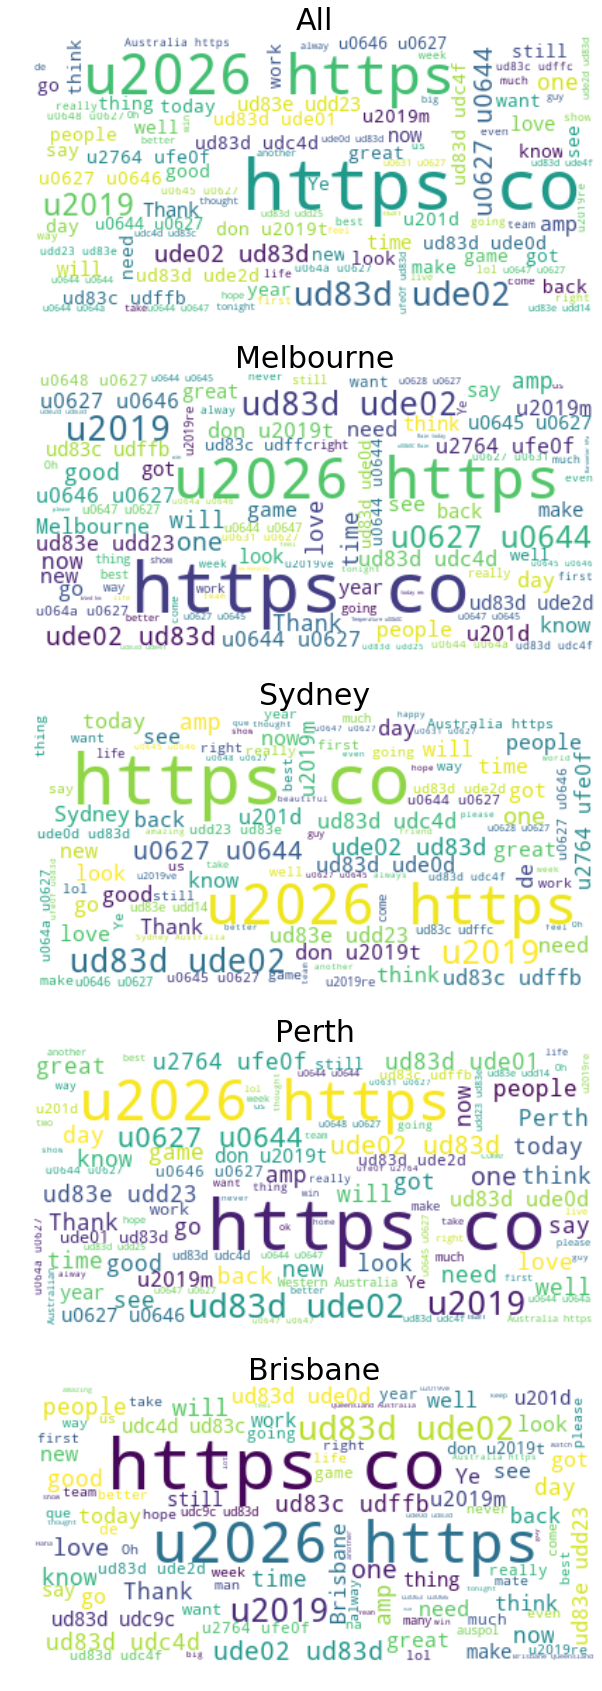

In [8]:
# Create and generate a word cloud image:
wordcloud_all = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_all)
wordcloud_melbourne = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_melbourne)
wordcloud_sydney = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_sydney)
wordcloud_perth = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_perth)
wordcloud_brisbane = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_brisbane)

fig = plt.figure(figsize=[60, 30])
ax = fig.subplots(5, 1)

# Display the generated image:
ax[0].imshow(wordcloud_all, interpolation='bilinear')
ax[0].set_title('All', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_melbourne, interpolation='bilinear')
ax[1].set_title('Melbourne',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_sydney, interpolation='bilinear')
ax[2].set_title('Sydney',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_perth, interpolation='bilinear')
ax[3].set_title('Perth',fontsize=30)
ax[3].axis('off')
ax[4].imshow(wordcloud_brisbane, interpolation='bilinear')
ax[4].set_title('Brisbane',fontsize=30)
ax[4].axis('off')

TODO The data has lots of url and unicodes that need to be processed

### Distribution of length of text compared to city

In [9]:
train_raw["TextLength"] = train_raw.Text.apply(len)

In [10]:
train_raw.head()

,Instance_ID,Location,Text,TextLength
0,1,Melbourne,"\ud83c\udf17 @ Melbourne, Victoria, Australia ...",69
1,2,Melbourne,"@theage Of course it costs more, minimum stand...",129
2,3,Brisbane,Hope people make just as much noise as they di...,145
3,4,Perth,Pouring the perfect Prosecco \ud83e\udd42\ud83...,175
4,5,Perth,"$LNY losing traction at 0.014, see this retrac...",111


In [11]:
train_melbourne = train_raw[train_raw.Location == "Melbourne"]
train_sydney = train_raw[train_raw.Location == "Sydney"]
train_perth = train_raw[train_raw.Location == "Perth"]
train_brisbane = train_raw[train_raw.Location == "Brisbane"]

Text(0.5, 1.0, 'Brisbane')

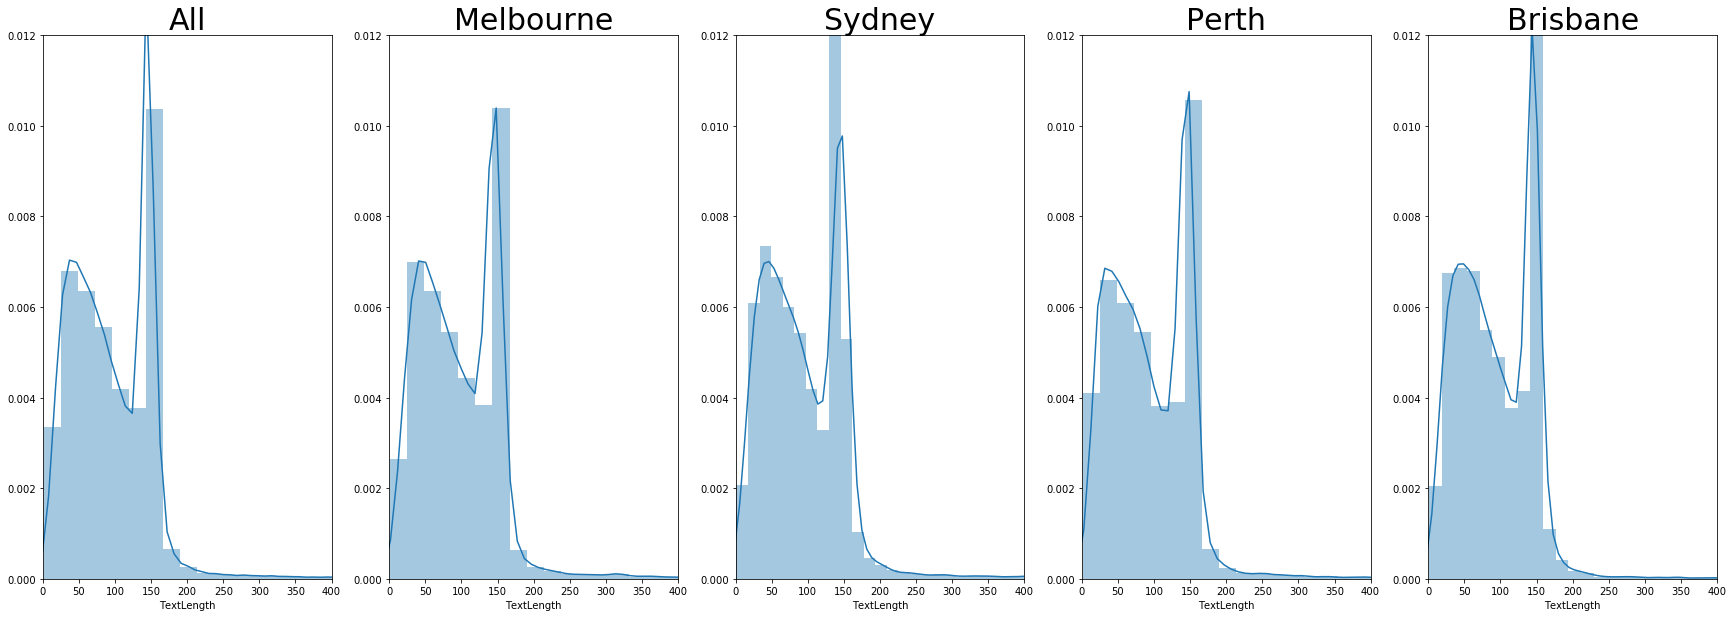

In [12]:
fig, ax = plt.subplots(1, 5, figsize=[30, 10])
sns.distplot(train_raw.TextLength, ax=ax[0])
ax[0].set_xlim([0, 400])
ax[0].set_ylim([0, 0.012])
ax[0].set_title('All', fontsize=30)
sns.distplot(train_melbourne.TextLength, ax=ax[1])
ax[1].set_xlim([0, 400])
ax[1].set_ylim([0, 0.012])
ax[1].set_title('Melbourne', fontsize=30)
sns.distplot(train_sydney.TextLength, ax=ax[2])
ax[2].set_xlim([0, 400])
ax[2].set_ylim([0, 0.012])
ax[2].set_title('Sydney', fontsize=30)
sns.distplot(train_perth.TextLength, ax=ax[3])
ax[3].set_xlim([0, 400])
ax[3].set_ylim([0, 0.012])
ax[3].set_title('Perth', fontsize=30)
sns.distplot(train_brisbane.TextLength, ax=ax[4])
ax[4].set_xlim([0, 400])
ax[4].set_ylim([0, 0.012])
ax[4].set_title('Brisbane', fontsize=30)

We can see that there is slight difference in the peak distribution in each city.

#### Unicode Processing
1. See some sample Unicode

In [15]:
samples = np.random.choice(train_raw.Text, size=5)
unicode_matcher = re.compile(r"\d+")
for sample in samples:
    search = re.search(unicode_matcher, sample)
    if search:
        print(search.group())

2764
2026
2019


In [16]:
train_raw["TokenizedText"] = train_raw.apply(lambda row: p.tokenize(row["Text"]), axis=1, result_type="expand")
train_raw.head(5)

,Instance_ID,Location,Text,TextLength,TokenizedText
0,1,Melbourne,"\ud83c\udf17 @ Melbourne, Victoria, Australia ...",69,"\ud83c\udf17 $MENTION$ Melbourne, Victoria, Au..."
1,2,Melbourne,"@theage Of course it costs more, minimum stand...",129,"$MENTION$ Of course it costs more, minimum sta..."
2,3,Brisbane,Hope people make just as much noise as they di...,145,Hope people make just as much noise as they di...
3,4,Perth,Pouring the perfect Prosecco \ud83e\udd42\ud83...,175,Pouring the perfect Prosecco \ud83e\udd42\ud83...
4,5,Perth,"$LNY losing traction at 0.014, see this retrac...",111,"$LNY losing traction at $NUMBER$14, see this r..."


In [17]:
train_raw["CleanedText"] = train_raw.apply(lambda row: p.clean(row["Text"]), axis=1, result_type="expand")
train_raw.head(5)

,Instance_ID,Location,Text,TextLength,TokenizedText,CleanedText
0,1,Melbourne,"\ud83c\udf17 @ Melbourne, Victoria, Australia ...",69,"\ud83c\udf17 $MENTION$ Melbourne, Victoria, Au...","\ud83c\udf17 Melbourne, Victoria, Australia"
1,2,Melbourne,"@theage Of course it costs more, minimum stand...",129,"$MENTION$ Of course it costs more, minimum sta...","Of course it costs more, minimum standards are..."
2,3,Brisbane,Hope people make just as much noise as they di...,145,Hope people make just as much noise as they di...,Hope people make just as much noise as they di...
3,4,Perth,Pouring the perfect Prosecco \ud83e\udd42\ud83...,175,Pouring the perfect Prosecco \ud83e\udd42\ud83...,Pouring the perfect Prosecco \ud83e\udd42\ud83...
4,5,Perth,"$LNY losing traction at 0.014, see this retrac...",111,"$LNY losing traction at $NUMBER$14, see this r...","$LNY losing traction at 14, see this retracing..."


In [18]:
pd.set_option('display.max_colwidth', -1)
train_raw.iloc[3]

Instance_ID      4                                                                                                                                                                              
Location         Perth                                                                                                                                                                          
Text             Pouring the perfect Prosecco \ud83e\udd42\ud83c\udf7e . \ud83d\udccdTHE GLOBE, PERTH . theglobeperth #prosecco #brunch #theglobe #birthdayweekend\u2026 https://t.co/uZmQPt7lX3
TextLength       175                                                                                                                                                                            
TokenizedText    Pouring the perfect Prosecco \ud83e\udd42\ud83c\udf7e . \ud83d\udccdTHE GLOBE, PERTH . theglobeperth $HASHTAG$ $HASHTAG$ $HASHTAG$ $HASHTAG$\u2026 $URL$                       
CleanedText      Pouring the perfec

In [24]:
import re

def process_unicode(m):
    '''process(m) -> Unicode code point

    m is a regular expression match object that has groups below:
     1: high Unicode surrogate 4-digit hex code d800-dbff
     2: low  Unicode surrogate 4-digit hex code dc00-dfff
     3: None
    OR
     1: None
     2: None
     3: Unicode 4-digit hex code 0000-d700,e000-ffff
    '''
    if m.group(3) is None:
        # Construct code point from UTF-16 surrogates
        hi = int(m.group(1),16) & 0x3FF
        lo = int(m.group(2),16) & 0x3FF
        cp = 0x10000 | hi << 10 | lo
    else:
        cp = int(m.group(3),16)
    return chr(cp)

def full_process_unicode(m):
    return re.sub(r'\\u(d[89ab][0-9a-f]{2})\\u(d[cdef][0-9a-f]{2})|\\u([0-9a-f]{4})',process_unicode,m)
    
s = full_process_unicode(train_raw.iloc[3, 2])
print(s)

Pouring the perfect Prosecco 🥂🍾 . 📍THE GLOBE, PERTH . theglobeperth #prosecco #brunch #theglobe #birthdayweekend… https://t.co/uZmQPt7lX3


In [26]:
train_raw["TextUnicodeProcessed"] = train_raw.apply(lambda row: full_process_unicode(row["Text"]), axis=1, result_type="expand")

In [27]:
train_raw["UnicodeTokenizedText"] = train_raw.apply(lambda row: p.tokenize(row["TextUnicodeProcessed"]), axis=1, result_type="expand")
train_raw.head(5)

,Instance_ID,Location,Text,TextLength,TokenizedText,CleanedText,TextUnicodeProcessed,UnicodeTokenizedText
0,1,Melbourne,"\ud83c\udf17 @ Melbourne, Victoria, Australia https://t.co/fMLkB0dQgZ",69,"\ud83c\udf17 $MENTION$ Melbourne, Victoria, Australia $URL$","\ud83c\udf17 Melbourne, Victoria, Australia","🌗 @ Melbourne, Victoria, Australia https://t.co/fMLkB0dQgZ","$EMOJI$ $MENTION$ Melbourne, Victoria, Australia $URL$"
1,2,Melbourne,"@theage Of course it costs more, minimum standards are a must, anything under 50 squares for a one bedroom apartment, unliveable.",129,"$MENTION$ Of course it costs more, minimum standards are a must, anything under $NUMBER$ squares for a one bedroom apartment, unliveable.","Of course it costs more, minimum standards are a must, anything under squares for a one bedroom apartment, unliveable.","@theage Of course it costs more, minimum standards are a must, anything under 50 squares for a one bedroom apartment, unliveable.","$MENTION$ Of course it costs more, minimum standards are a must, anything under $NUMBER$ squares for a one bedroom apartment, unliveable."
2,3,Brisbane,Hope people make just as much noise as they did with the tpj shot ... that's definitely a dog act by the storm play\u2026 https://t.co/ODoNYGmdxz,145,Hope people make just as much noise as they did with the tpj shot ... that's definitely a dog act by the storm play\u2026 $URL$,Hope people make just as much noise as they did with the tpj shot ... that's definitely a dog act by the storm play\u2026,Hope people make just as much noise as they did with the tpj shot ... that's definitely a dog act by the storm play… https://t.co/ODoNYGmdxz,Hope people make just as much noise as they did with the tpj shot ... that's definitely a dog act by the storm play… $URL$
3,4,Perth,"Pouring the perfect Prosecco \ud83e\udd42\ud83c\udf7e . \ud83d\udccdTHE GLOBE, PERTH . theglobeperth #prosecco #brunch #theglobe #birthdayweekend\u2026 https://t.co/uZmQPt7lX3",175,"Pouring the perfect Prosecco \ud83e\udd42\ud83c\udf7e . \ud83d\udccdTHE GLOBE, PERTH . theglobeperth $HASHTAG$ $HASHTAG$ $HASHTAG$ $HASHTAG$\u2026 $URL$","Pouring the perfect Prosecco \ud83e\udd42\ud83c\udf7e . \ud83d\udccdTHE GLOBE, PERTH . theglobeperth \u2026","Pouring the perfect Prosecco 🥂🍾 . 📍THE GLOBE, PERTH . theglobeperth #prosecco #brunch #theglobe #birthdayweekend… https://t.co/uZmQPt7lX3","Pouring the perfect Prosecco 🥂$EMOJI$ . $EMOJI$THE GLOBE, PERTH . theglobeperth $HASHTAG$ $HASHTAG$ $HASHTAG$ $HASHTAG$… $URL$"
4,5,Perth,"$LNY losing traction at 0.014, see this retracing back to 0.011 to 0.012 in near short term before next leg up.",111,"$LNY losing traction at $NUMBER$14, see this retracing back to $NUMBER$11 to $NUMBER$12 in near short term before next leg up.","$LNY losing traction at 14, see this retracing back to 11 to 12 in near short term before next leg up.","$LNY losing traction at 0.014, see this retracing back to 0.011 to 0.012 in near short term before next leg up.","$LNY losing traction at $NUMBER$14, see this retracing back to $NUMBER$11 to $NUMBER$12 in near short term before next leg up."


In [28]:
train_raw["UnicodeCleanedText"] = train_raw.apply(lambda row: p.clean(row["TextUnicodeProcessed"]), axis=1, result_type="expand")
train_raw.head(5)

,Instance_ID,Location,Text,TextLength,TokenizedText,CleanedText,TextUnicodeProcessed,UnicodeTokenizedText,UnicodeCleanedText
0,1,Melbourne,"\ud83c\udf17 @ Melbourne, Victoria, Australia https://t.co/fMLkB0dQgZ",69,"\ud83c\udf17 $MENTION$ Melbourne, Victoria, Australia $URL$","\ud83c\udf17 Melbourne, Victoria, Australia","🌗 @ Melbourne, Victoria, Australia https://t.co/fMLkB0dQgZ","$EMOJI$ $MENTION$ Melbourne, Victoria, Australia $URL$","Melbourne, Victoria, Australia"
1,2,Melbourne,"@theage Of course it costs more, minimum standards are a must, anything under 50 squares for a one bedroom apartment, unliveable.",129,"$MENTION$ Of course it costs more, minimum standards are a must, anything under $NUMBER$ squares for a one bedroom apartment, unliveable.","Of course it costs more, minimum standards are a must, anything under squares for a one bedroom apartment, unliveable.","@theage Of course it costs more, minimum standards are a must, anything under 50 squares for a one bedroom apartment, unliveable.","$MENTION$ Of course it costs more, minimum standards are a must, anything under $NUMBER$ squares for a one bedroom apartment, unliveable.","Of course it costs more, minimum standards are a must, anything under squares for a one bedroom apartment, unliveable."
2,3,Brisbane,Hope people make just as much noise as they did with the tpj shot ... that's definitely a dog act by the storm play\u2026 https://t.co/ODoNYGmdxz,145,Hope people make just as much noise as they did with the tpj shot ... that's definitely a dog act by the storm play\u2026 $URL$,Hope people make just as much noise as they did with the tpj shot ... that's definitely a dog act by the storm play\u2026,Hope people make just as much noise as they did with the tpj shot ... that's definitely a dog act by the storm play… https://t.co/ODoNYGmdxz,Hope people make just as much noise as they did with the tpj shot ... that's definitely a dog act by the storm play… $URL$,Hope people make just as much noise as they did with the tpj shot ... that's definitely a dog act by the storm play…
3,4,Perth,"Pouring the perfect Prosecco \ud83e\udd42\ud83c\udf7e . \ud83d\udccdTHE GLOBE, PERTH . theglobeperth #prosecco #brunch #theglobe #birthdayweekend\u2026 https://t.co/uZmQPt7lX3",175,"Pouring the perfect Prosecco \ud83e\udd42\ud83c\udf7e . \ud83d\udccdTHE GLOBE, PERTH . theglobeperth $HASHTAG$ $HASHTAG$ $HASHTAG$ $HASHTAG$\u2026 $URL$","Pouring the perfect Prosecco \ud83e\udd42\ud83c\udf7e . \ud83d\udccdTHE GLOBE, PERTH . theglobeperth \u2026","Pouring the perfect Prosecco 🥂🍾 . 📍THE GLOBE, PERTH . theglobeperth #prosecco #brunch #theglobe #birthdayweekend… https://t.co/uZmQPt7lX3","Pouring the perfect Prosecco 🥂$EMOJI$ . $EMOJI$THE GLOBE, PERTH . theglobeperth $HASHTAG$ $HASHTAG$ $HASHTAG$ $HASHTAG$… $URL$","Pouring the perfect Prosecco 🥂 . THE GLOBE, PERTH . theglobeperth …"
4,5,Perth,"$LNY losing traction at 0.014, see this retracing back to 0.011 to 0.012 in near short term before next leg up.",111,"$LNY losing traction at $NUMBER$14, see this retracing back to $NUMBER$11 to $NUMBER$12 in near short term before next leg up.","$LNY losing traction at 14, see this retracing back to 11 to 12 in near short term before next leg up.","$LNY losing traction at 0.014, see this retracing back to 0.011 to 0.012 in near short term before next leg up.","$LNY losing traction at $NUMBER$14, see this retracing back to $NUMBER$11 to $NUMBER$12 in near short term before next leg up.","$LNY losing traction at 14, see this retracing back to 11 to 12 in near short term before next leg up."


In [33]:
train_raw.iloc[3]["UnicodeTokenizedText"]

'Pouring the perfect Prosecco 🥂$EMOJI$ . $EMOJI$THE GLOBE, PERTH . theglobeperth $HASHTAG$ $HASHTAG$ $HASHTAG$ $HASHTAG$… $URL$'

Most unicodes (EMOJI) are now replaced with token

### Deal with punctuation 

In [42]:
remove_punct(train_raw["TextUnicodeProcessed"].iloc[3])

'Pouring the perfect Prosecco 🥂🍾  📍THE GLOBE PERTH  theglobeperth prosecco brunch theglobe birthdayweekend… httpstcouZmQPtlX'

In [35]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

train_raw['RemovePunct'] = train_raw['UnicodeTokenizedText'].apply(lambda x: remove_punct(x))
train_raw.head(5)

,Instance_ID,Location,Text,TextLength,TokenizedText,CleanedText,TextUnicodeProcessed,UnicodeTokenizedText,UnicodeCleanedText,RemovePunct
0,1,Melbourne,"\ud83c\udf17 @ Melbourne, Victoria, Australia https://t.co/fMLkB0dQgZ",69,"\ud83c\udf17 $MENTION$ Melbourne, Victoria, Australia $URL$","\ud83c\udf17 Melbourne, Victoria, Australia","🌗 @ Melbourne, Victoria, Australia https://t.co/fMLkB0dQgZ","$EMOJI$ $MENTION$ Melbourne, Victoria, Australia $URL$","Melbourne, Victoria, Australia",EMOJI MENTION Melbourne Victoria Australia URL
1,2,Melbourne,"@theage Of course it costs more, minimum standards are a must, anything under 50 squares for a one bedroom apartment, unliveable.",129,"$MENTION$ Of course it costs more, minimum standards are a must, anything under $NUMBER$ squares for a one bedroom apartment, unliveable.","Of course it costs more, minimum standards are a must, anything under squares for a one bedroom apartment, unliveable.","@theage Of course it costs more, minimum standards are a must, anything under 50 squares for a one bedroom apartment, unliveable.","$MENTION$ Of course it costs more, minimum standards are a must, anything under $NUMBER$ squares for a one bedroom apartment, unliveable.","Of course it costs more, minimum standards are a must, anything under squares for a one bedroom apartment, unliveable.",MENTION Of course it costs more minimum standards are a must anything under NUMBER squares for a one bedroom apartment unliveable
2,3,Brisbane,Hope people make just as much noise as they did with the tpj shot ... that's definitely a dog act by the storm play\u2026 https://t.co/ODoNYGmdxz,145,Hope people make just as much noise as they did with the tpj shot ... that's definitely a dog act by the storm play\u2026 $URL$,Hope people make just as much noise as they did with the tpj shot ... that's definitely a dog act by the storm play\u2026,Hope people make just as much noise as they did with the tpj shot ... that's definitely a dog act by the storm play… https://t.co/ODoNYGmdxz,Hope people make just as much noise as they did with the tpj shot ... that's definitely a dog act by the storm play… $URL$,Hope people make just as much noise as they did with the tpj shot ... that's definitely a dog act by the storm play…,Hope people make just as much noise as they did with the tpj shot thats definitely a dog act by the storm play… URL
3,4,Perth,"Pouring the perfect Prosecco \ud83e\udd42\ud83c\udf7e . \ud83d\udccdTHE GLOBE, PERTH . theglobeperth #prosecco #brunch #theglobe #birthdayweekend\u2026 https://t.co/uZmQPt7lX3",175,"Pouring the perfect Prosecco \ud83e\udd42\ud83c\udf7e . \ud83d\udccdTHE GLOBE, PERTH . theglobeperth $HASHTAG$ $HASHTAG$ $HASHTAG$ $HASHTAG$\u2026 $URL$","Pouring the perfect Prosecco \ud83e\udd42\ud83c\udf7e . \ud83d\udccdTHE GLOBE, PERTH . theglobeperth \u2026","Pouring the perfect Prosecco 🥂🍾 . 📍THE GLOBE, PERTH . theglobeperth #prosecco #brunch #theglobe #birthdayweekend… https://t.co/uZmQPt7lX3","Pouring the perfect Prosecco 🥂$EMOJI$ . $EMOJI$THE GLOBE, PERTH . theglobeperth $HASHTAG$ $HASHTAG$ $HASHTAG$ $HASHTAG$… $URL$","Pouring the perfect Prosecco 🥂 . THE GLOBE, PERTH . theglobeperth …",Pouring the perfect Prosecco 🥂EMOJI EMOJITHE GLOBE PERTH theglobeperth HASHTAG HASHTAG HASHTAG HASHTAG… URL
4,5,Perth,"$LNY losing traction at 0.014, see this retracing back to 0.011 to 0.012 in near short term before next leg up.",111,"$LNY losing traction at $NUMBER$14, see this retracing back to $NUMBER$11 to $NUMBER$12 in near short term before next leg up.","$LNY losing traction at 14, see this retracing back to 11 to 12 in near short term before next leg up.","$LNY losing traction at 0.014, see this retracing back to 0.011 to 0.012 in near short term before next leg up.","$LNY losing traction at $NUMBER$14, see this retracing back to $NUMBER$11 to $NUMBER$12 in near short term before next leg up.","$LNY losing traction at 14, see this retracing back to 11 to 12 in near short term before next leg up.",LNY losing

In [59]:
# Is number replaced?
def find_numbers(df: pd.DataFrame, column="RemovePunct", max_found=5, show=False):
    number_pattern = re.compile("\d+")
    n_found = 0
    for iid, row in df.iterrows():
        find_all = re.findall(number_pattern, row[column])
        if find_all:
            n_found += 1
            if show:
                print(f"---------- {iid} ---------")
                print(row)
        if n_found >= max_found:
            break
    return n_found
        
        

In [61]:
find_numbers(train_raw, max_found=99999999)
# We have almost successfully cleaned up most of the data.
# We will not worry about numbers for they have a small presence

28

In [62]:
# See some examples of numbers in text to see if it will go wrong badly
find_numbers(train_raw, max_found=3, show=True)

---------- 59 ---------
Instance_ID             60                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
Location                Sydney                                                                                                                                                                                                                                                                                                                                                                                    

3

We see these examples all contain unicode of some sort, that's the reason the tokenizer failed to remove the numbers    

### STEMMING

In [63]:
# TODO use stanform pycorenlp for this
# from pycorenlp import StanfordCoreNLP
# nlp = StanfordCoreNLP('http://localhost:9000')

### Wordcloud after some simple preprocessing

In [43]:
train_melbourne = train_raw[train_raw.Location == "Melbourne"]
train_sydney = train_raw[train_raw.Location == "Sydney"]
train_perth = train_raw[train_raw.Location == "Perth"]
train_brisbane = train_raw[train_raw.Location == "Brisbane"]

text_all = " ".join(train_raw.UnicodeTokenizedText.values)
text_melbourne = " ".join(train_melbourne.UnicodeTokenizedText.values)
text_sydney = " ".join(train_sydney.UnicodeTokenizedText.values)
text_perth = " ".join(train_perth.UnicodeTokenizedText.values)
text_brisbane = " ".join(train_brisbane.UnicodeTokenizedText.values)

(-0.5, 399.5, 199.5, -0.5)

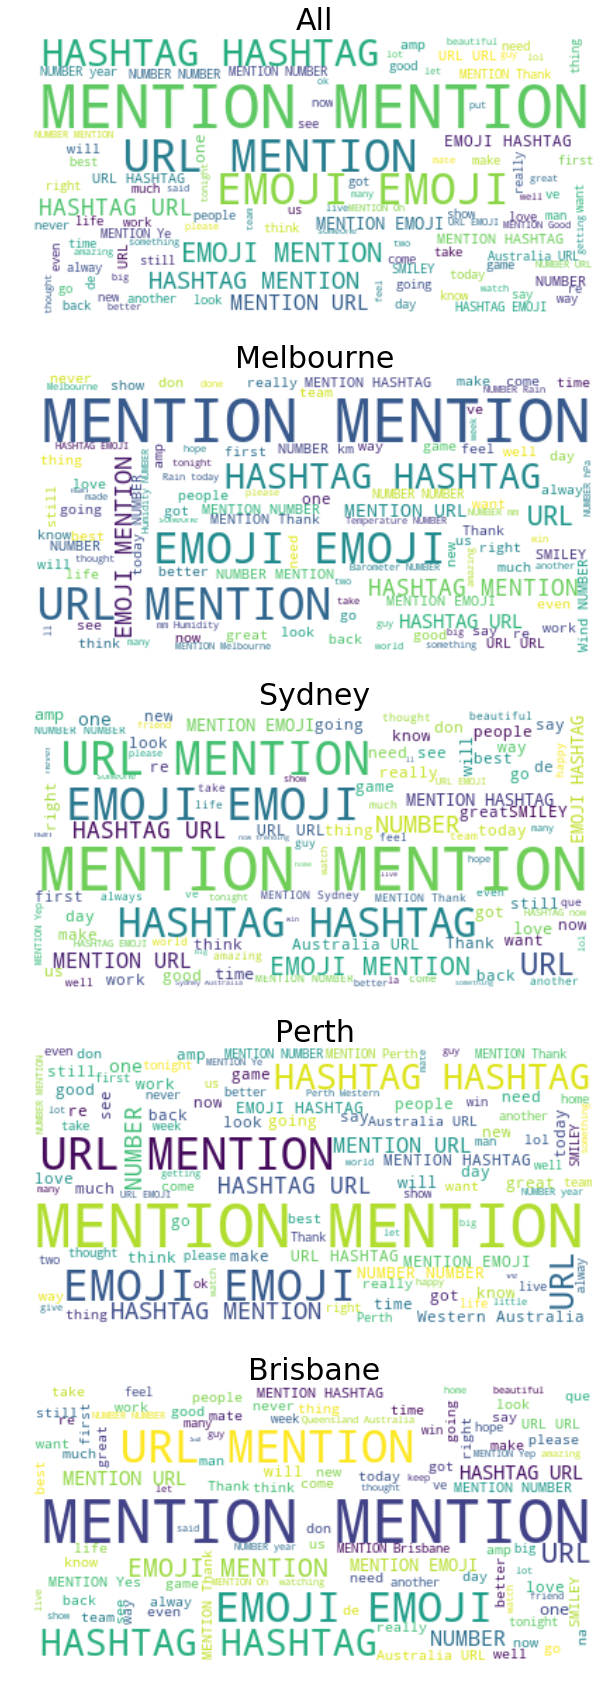

In [44]:
# Create and generate a word cloud image:
wordcloud_all = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_all)
wordcloud_melbourne = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_melbourne)
wordcloud_sydney = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_sydney)
wordcloud_perth = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_perth)
wordcloud_brisbane = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_brisbane)

fig = plt.figure(figsize=[60, 30])
ax = fig.subplots(5, 1)

# Display the generated image:
ax[0].imshow(wordcloud_all, interpolation='bilinear')
ax[0].set_title('All', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_melbourne, interpolation='bilinear')
ax[1].set_title('Melbourne',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_sydney, interpolation='bilinear')
ax[2].set_title('Sydney',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_perth, interpolation='bilinear')
ax[3].set_title('Perth',fontsize=30)
ax[3].axis('off')
ax[4].imshow(wordcloud_brisbane, interpolation='bilinear')
ax[4].set_title('Brisbane',fontsize=30)
ax[4].axis('off')

Most of the texts are URL/MENSION/EMOJI/HASHTAG, some of the texts are location related texts

### Try to make a word count transformer

In [91]:
# TODO adapt this code to suit this task
from sklearn.base import BaseEstimator, TransformerMixin

class WordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True,
                 replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
        
    def fit(self, X_train, y_train=None):
        return self
    
    def transform(self, X_train, y_train=None):
        X_transformed = []
        for email in X_train:
            text = email_to_text(email)
            if self.strip_headers:
                pass
            if self.lower_case:
                text = text.lower()
            if self.replace_urls:
                urls = list(set(urlextract.URLExtract().find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*(?:[eE]\d+))?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

## Try some simple classifier with the given chisq files and see the accuracy

### MULTINOMINAL NB
From our prior observation, this might not perform well for the prior for this dataset is very uninformative.

In [86]:
from sklearn.naive_bayes import MultinomialNB

In [88]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import LabelEncoder


class DataFrameLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, label="Location"):
        self._label = label
        self._label_encoder = LabelEncoder()
        
    def fit(self, X, y=None):
        self._label_encoder.fit(X[self._label])
        return self
    
    def transform(self, X, y=None):
        return X.assign(**{"EncodedLabel": self._label_encoder.transform(X[self._label])})

class ChisqDataToTrainTest(BaseEstimator, TransformerMixin):
    def __init__(self, label="EncodedLabel", columns_to_remove=["Instance_ID", "Location", "EncodedLabel"]):
        self._columns_to_remove = columns_to_remove
        self._label = label
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_train = X.loc[:, [i for i in train_10.columns if i not in self._columns_to_remove]].to_numpy()
        y_train = X.loc[:, self._label].to_numpy()
        
        return X_train, y_train


df_label_encoder = DataFrameLabelEncoder()
df_train_test_converter = ChisqDataToTrainTest()
X_train, y_train = df_train_test_converter.fit_transform(df_label_encoder.fit_transform(train_10))
X_train[:5], y_train[:5]

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), array([1, 1, 0, 2, 2]))

In [89]:
mnb = MultinomialNB()
mnb.fit(X=X_train, y=y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [90]:
X_dev, y_dev = df_train_test_converter.fit_transform(df_label_encoder.fit_transform(dev_10)) 
mnb.score(X_dev, y_dev)

0.29491370993675636